<a href="https://colab.research.google.com/github/Emily-Weng/Deep-Learning-Basis/blob/main/108703042%E8%B3%87%E7%A7%91%E4%B8%89%E7%BF%81%E6%84%89%E5%AA%83_%E7%A8%8B%E5%BC%8F%E4%BD%9C%E6%A5%AD%E5%85%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

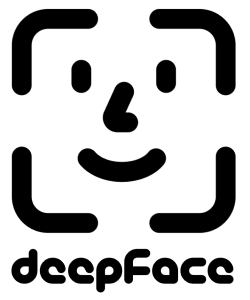


這裡介紹一個叫 [DeepFace](https://github.com/serengil/deepface) 的套件, 希望你能得到點啟發, 神速做個有趣的小 app 出來!

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 安裝並導入 DeepFace (套件)

In [ ]:
!pip install deepface

     |████████████████████████████████| 62 kB 994 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 12.0 MB/s 
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=3242b52260b5072efbbf8f37c8ff82a003de03bdec82e11b559c13b220e1def4
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


### 2. 讀入範例照片集

之後可以依範例這樣, 一個人就一個資料夾, 每個資料夾裡面甚至可以只有一張照片!

讀入 `photos.zip`。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget --no-check-certificate \
    https://github.com/yenlung/Deep-Learning-Basics/raw/master/images/photos.zip \
    -O /content/photos.zip

--2022-01-13 13:32:25--  https://github.com/yenlung/Deep-Learning-Basics/raw/master/images/photos.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yenlung/Deep-Learning-Basics/master/images/photos.zip [following]
--2022-01-13 13:32:25--  https://raw.githubusercontent.com/yenlung/Deep-Learning-Basics/master/images/photos.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1758026 (1.7M) [application/zip]
Saving to: ‘/content/photos.zip’

/content/photos.zip 100%[===================>]   1.68M  --.-KB/s    in 0.07s   

2022-01-13 13:32:26 (23.2 MB/s) - ‘/content/photos.zip’ saved [1758026/175802

再來就是解壓縮。

In [ ]:
import os
import zipfile

local_zip = '/content/photos.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

我們在 `/content/photos` 這個資料夾下的架構如下:

> faces: 每個人有獨立的資料夾。

> 另外有準備做測試的一些照片。

### 3. 照片展示程式

這裡只是秀出照片, 看照片內容是什麼。

In [ ]:
import cv2

In [ ]:
def show_image(*args):
    k = len(args)
    fig = plt.figure(figsize=(5*k, 5))
    for i, photo in enumerate(args):
        plt.subplot(1,k,i+1)
        plt.axis('off')
        plt.axis('equal')
        plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))

使用方式是這樣, 如果有一張照片 `im01` 要秀出來:

```python
show_image(im01)
```

多張照片同時要秀出來也可以, 比如說:

```python
show_image(im01, im02)
```

等等。

### 4. `verify` 看兩個人是不是同一個人

In [ ]:
base_dir = "/content/photos"   #不同人資料夾照片在哪裡
face_dir = "/content/photos/faces"  #準備要實測時

In [ ]:
im01_path ="/content/drive/MyDrive/Colab Notebooks/程式作業六/photos/國瑜.jpg" #第一人的照片
im01 = cv2.imread(im01_path)

In [ ]:
im02_path = "/content/drive/MyDrive/Colab Notebooks/程式作業六/photos/faces/Guoyu/韓導.jpg" #第二人的照片
im02 = cv2.imread(im02_path)

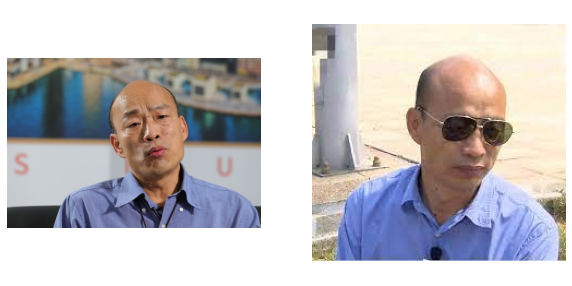

In [ ]:
show_image(im01, im02) #同一人不同照片比對兩人是否為同一人

In [ ]:
result  = DeepFace.verify(im01, im02, enforce_detection=False)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [01:14<00:00, 7.76MB/s]


我們看看 `result`。

In [ ]:
result

{'distance': 0.3801636759872281,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'verified': True}

這裡的重點是 `verified`, 看是否為同一個人。因此我們也可以直接看結論:

```python
result[`verified`]
```

另外我們還可以選不同的 `model` 來做這件事。有多項選擇可用:

`VGG-Face`, `Facenet`, `Facenet512`, `OpenFace`, `DeepFace`, `DeepID`, `ArcFace`, `Dlib`

比如說我們想試試 `Facenet512`, 那就是這麼下指令。

In [ ]:
result  = DeepFace.verify(im01, im02, model_name="Facenet512",enforce_detection=False)

facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:06<00:00, 14.2MB/s]


In [ ]:
result['verified']

False

#### 【應用的想法】

1. 我們可以做一個 web app, 讓使用者輸入兩張照片, 回應他們是同一個人, 或不同的人。
2. 當然更酷的應該是, 我們去比對我們的資料庫照片, 看這個人是誰! 那這不就是人臉辨識了嗎? 沒錯是這樣, 我們只要像範例一樣, 建一個 `faces` 資料夾, 之下每個人都有自己的資料夾就可以。而且, 我們不需要自己寫程式一一比對, 因為 `DeepFace` 預計我們就是要做這件事!!

### 5. `find` 辨識一下這位是誰

In [ ]:
im03_path = "/content/drive/MyDrive/Colab Notebooks/程式作業六/photos/Leehom.jpg"
im03 = cv2.imread(im03_path) #把每個放在資料庫的檔案一一做比對

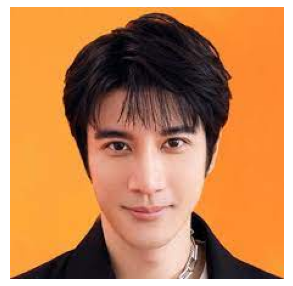

In [ ]:
show_image(im03)

以下就是人臉辨識示範。我們只需要輸入照片的檔名, 再來是放有每個人照片資料夾的路徑就好。這裡用了

```python
enforce_detection=False
```

是有時系統找不到人臉在哪裡 (!#@*$) 於是我們就說找不到就別找了。

In [ ]:
df = DeepFace.find(img_path=im03_path, db_path="/content/drive/MyDrive/Colab Notebooks/程式作業六/photos/faces", enforce_detection=False)

Representations stored in  /content/drive/MyDrive/Colab Notebooks/程式作業六/photos/faces / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  3.235851287841797  seconds


這是一個 `pandas` (終於出現了!) 的 DataFrame。第 0 筆數據就是判定最像的那一位! 因為我們把每個人的名字當資料夾名稱, 所以想辦法找出資料夾名稱, 我們就知道是誰了!

In [ ]:
name = df.loc[0].values[0].split('/')[-2]

In [ ]:
print(f"我辨識這位是 {name}。") #比對完會告訴我們他跟哪檔案裡的人長一樣 會告訴我檔名名稱

我辨識這位是 Leehom。


#### 【應用的想法】

1. 雖然用資料夾名稱 (即每個人的名字) 用中文應該也可以, 但像這樣用英文還是保險。不過顯示時要換成中文當然沒有問題, 比如說做一個字典就好! 於是可以試寫一個人臉辨識 app 了!
2. 我們也可以更厲害的去計算這 AI 覺得是哪個人的機會有多高。試試能不能做出這樣的 app。

### 6. `analyze` 分析一下照片中這個人

我們可以分析一下照片中這個人的性別、年齡、種族、情緒!

In [ ]:
im04_path = "/content/drive/MyDrive/Colab Notebooks/程式作業六/photos/憨豆.jpg"
im04 = cv2.imread(im04_path)

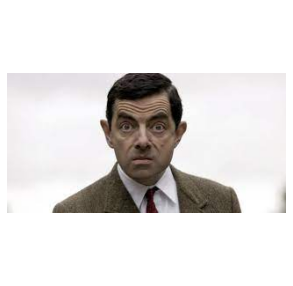

In [ ]:
show_image(im04)

In [ ]:
obj = DeepFace.analyze(img_path = im04_path, actions = ['age', 'gender', 'race', 'emotion'])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 9.21MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [02:03<00:00, 4.38MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
 51%|█████     | 273M/537M [00:59<00:58, 4.56MB/s]


OSError: ignored

In [ ]:
obj

這裡做個簡單示範, 看我們如何更親切的呈現結果。

In [ ]:
labels = {'angry':'生氣', 'disgust':'厭惡', 'fear':'恐懼',
          'happy':'開心', 'neutral':'沒什麼特別表情', 
          'sad':'悲傷', 'surprise':'吃驚',
          'Man':'男', 'Woman':'女',
          'asian':'亞洲', 'black':'黑', 'indian':'印弟安',
          'latino hispanic':'拉丁美洲 (西班牙裔)', 
          'middle eastern':'中東', 'white':'白'}

In [ ]:
def show_info(obj):
    age = obj['age']
    emotion = labels[obj['dominant_emotion']]
    race = labels[obj['dominant_race']]
    gender = labels[obj['gender']]
    text = f"這是一位 {age} 歲的{race}人{gender}子, 他感覺是{emotion}的。"
    print(text)


In [ ]:
show_info(obj)
show_image(im04)

In [ ]:
im05_path = "/content/drive/MyDrive/Colab Notebooks/程式作業六/photos/S_112074799.jpg"
im05 = cv2.imread(im05_path)

In [ ]:
obj = DeepFace.analyze(img_path = im05_path, actions = ['age', 'gender', 'race', 'emotion'],enforce_detection=False)

In [ ]:
show_image(im05)
show_info(obj)

#### 【應用的想法】

相信大家這裡可以做出許多有趣的應用, 比如說:

1. 寫一個猜猜照片人物年齡的 app。
2. 完全不用訓練 (zero-shot learning) 的情緒偵測!
3. 當然歡迎更多天馬行空的創意想法!